## 📆 Week in Charts - 10/05/2022

### Imports and stylesheets

In [66]:
# Import matplotlib, fonts and stylesheet (optional)

import os
import matplotlib.pyplot as plt
from matplotlib import image
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.patches as mpatches

font_path = "../../assets/fonts"

for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y)
            except Exception:
                continue

plt.style.use("../../assets/mpl_styles/tukan_style.mplstyle")
from tukan_mkt.helpers import get_tukan_api_request
import pandas as pd
from highlight_text import ax_text, fig_text
from dateutil.relativedelta import relativedelta
from PIL import Image
import urllib
import matplotlib.patheffects as path_effects


### Chart 1: Hotel Occupancy Acapulco

In [67]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "hotel_rating",
        "location"
    ],
    "categories": {
        "hotel_rating": ["96253b7b4d8ada9"],
        "location": [
            "bea147778a1abb3"
        ]
    },
    "request": [
        {
            "table": "mex_sectur_hotel_activity",
            "variables": [
                "1ad7cedbf838ed0"
            ]
        }
    ],
    "from": "2018-01-01"
}

rooms_df = get_tukan_api_request(payload)["data"]

Success getting the data


In [68]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "hotel_rating",
        "location",
        "resident_type"
    ],
    "categories": {
        "hotel_rating": ["96253b7b4d8ada9"],
        "location": [
            "bea147778a1abb3"
        ],
        "resident_type": [
            "d9bdadcefaf6580"
        ]
    },
    "request": [
        {
            "table": "mex_sectur_hotel_activity",
            "variables": [
                "5329427561c2615"
            ]
        }
    ],
    "from": "2018-01-01"
}

occu_df = get_tukan_api_request(payload)["data"]

Success getting the data


In [69]:
df = pd.merge(occu_df, rooms_df, how = "left")
df = df[df["date"] < "2022-01-01"].copy()

In [70]:
df["occu_rate"] = df["5329427561c2615"]/df["1ad7cedbf838ed0"]
df = df.groupby([df.date.dt.year.rename("year"), df.date.dt.month.rename("month")])[["occu_rate"]].mean().reset_index()

In [71]:
material = {
    "blue": {
        0: "#e3f2fd",
        1: "#d0e2ff",
        2: "#90caf9",
        3: "#78a9ff",
        4: "#42a5f5",
        5: "#0043ce",
        6: "#1e88e5",
        7: "#001141",
        8: "#1565c0",
        9: "#0d47a1",
    }
}

months = {
    1: "enero",
    2: "febrero",
    3: "marzo",
    4: "abril",
    5: "mayo",
    6: "junio",
    7: "julio",
    8: "agosto",
    9: "septiembre",
    10: "octubre",
    11: "noviembre",
    12: "diciembre"
}

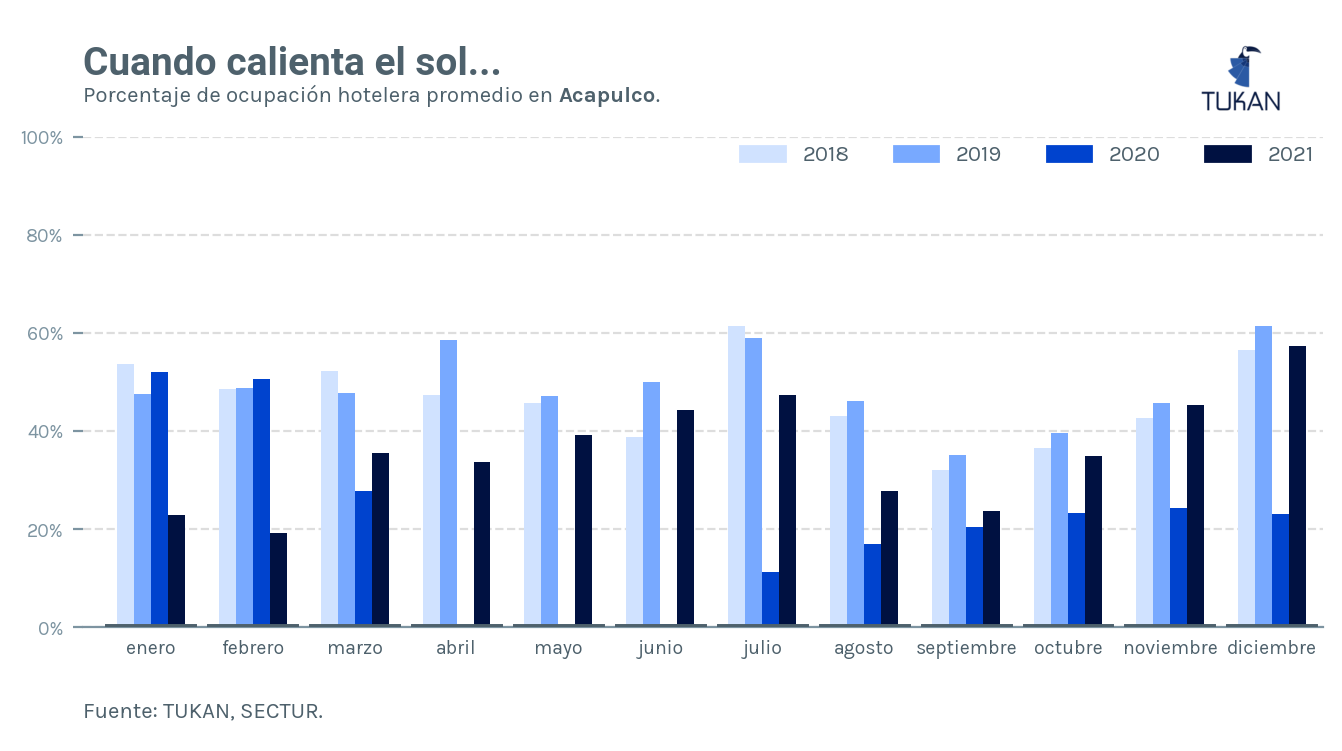

In [72]:
fig = plt.figure(dpi = 200, figsize = (8,3.25))
ax = plt.subplot(111)

X_ = range(1,13)
years = range(2018,2020)

def bars(origin, month, color = "blue", n = 4):
    X = origin + np.arange(n)
    H = df[df["month"] == month]["occu_rate"]

    ax.bar(
        X,
        H,
        width=1.0,
        align="edge",
        color=[material[color][1 + 2 * i] for i in range(n)],
        zorder = 3
    )
    ax.plot([origin - 0.5, origin + n + 0.5], [0, 0], color="#4E616C", lw=2.5, zorder = 3)
    ax.text(origin + n / 2, -0.025, f"{months[month]}", va="top", ha="center", size = 7)

n = 4
bars(0 * (n + 2), 1, "blue", n)
bars(1 * (n + 2), 2, "blue", n)
bars(2 * (n + 2), 3, "blue", n)
bars(3 * (n + 2), 4, "blue", n)
bars(4 * (n + 2), 5, "blue", n)
bars(5 * (n + 2), 6, "blue", n)
bars(6 * (n + 2), 7, "blue", n)
bars(7 * (n + 2), 8, "blue", n)
bars(8 * (n + 2), 9, "blue", n)
bars(9 * (n + 2), 10, "blue", n)
bars(10 * (n + 2), 11, "blue", n)
bars(11 * (n + 2), 12, "blue", n)

ax.set_xticks([])
ax.set_ylim(0,1)
ax.set_xlim(-2, 12 * (n + 2) - 1)
ax.yaxis.set_major_formatter("{x:,.0%}")
ax.tick_params(labelsize = 7)

plt.legend(
    # bbox_to_anchor=(0.0, 1.0, 1.0, 0.1),
    loc="upper right",
    borderaxespad=0.0,
    ncol=4,
    handles=[
        mpatches.Patch(color=material["blue"][1], label="2018"),
        mpatches.Patch(color=material["blue"][3], label="2019"),
        mpatches.Patch(color=material["blue"][5], label="2020"),
        mpatches.Patch(color=material["blue"][7], label="2021"),
    ],
)

fig_text(x = 0.125, y = 1.02, 
         s = "Cuando calienta el sol...",
        #  highlight_textprops=[{"color": "#084081"}],
         family = "Roboto",
         weight = "bold",
         fontsize = 14)

fig_text(x = 0.125, y = .96, 
         s = "Porcentaje de ocupación hotelera promedio en <Acapulco>.",
         highlight_textprops=[{"weight":"bold"}],
         family = "Karla",
         fontsize = 8)

tukan_im = image.imread("..\\..\\assets\\logo\\logo192.png")
newax = fig.add_axes([.76, .88, 0.18, 0.18], zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig_text(x = 0.125, y = .01, 
         s = "Fuente: TUKAN, SECTUR.",
         family = "Karla",
         fontsize = 8)

plt.savefig(
   "plots/acapulco_05102022.png",
   dpi=600,
   bbox_inches="tight",
   facecolor="none",
   edgecolor="none",
   transparent=True,
)

plt.savefig(
   "plots/acapulco_05102022_white.png",
   dpi=600,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

### EBITDA Mexican Supermarkets

In [73]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "institutions"
    ],
    "categories": {
        "institutions": [
            "355bfefce033583",
            "70974b4d77b8f30",
            "ecf1fe4d8e7de8d",
            "f0f333047f509b0"
        ]
    },
    "request": [
        {
            "table": "mex_bmv_eq_income_statement",
            "variables": [
                "23075fc7b0bc077",
                "132afad493928ea",
                "1249ce7b0286133"
            ]
        }
    ],
    "from": "2016-01-01"
}

data = get_tukan_api_request(payload)["data"]

Success getting the data


In [74]:
data.sort_values(by = ['institutions__ref', 'date'], inplace = True)
data = data.reset_index(drop = True).copy()

data.loc[:,'ltm_income'] = (
    data.groupby(['institutions__ref'])
    .rolling(on="date", window=4, min_periods=4)['23075fc7b0bc077']
    .sum()
    .reset_index(drop = True)
)

data.loc[:,'ltm_dpa'] = (
    data.groupby(['institutions__ref'])
    .rolling(on="date", window=4, min_periods=4)['1249ce7b0286133']
    .sum()
    .reset_index(drop = True)
)

data.loc[:,'ltm_operating'] = (
    data.groupby(['institutions__ref'])
    .rolling(on="date", window=4, min_periods=4)['132afad493928ea']
    .sum()
    .reset_index(drop = True)
)

data["ebitda"] = (data["ltm_operating"] + data["ltm_dpa"])/data["ltm_income"]
data

,date,institutions__ref,institutions,1249ce7b0286133,132afad493928ea,23075fc7b0bc077,ltm_income,ltm_dpa,ltm_operating,ebitda
0,2016-01-01,355bfefce033583,Grupo Comercial Chedraui,360149000.0,1.007272e+09,2.058074e+10,NaN,NaN,NaN,NaN
1,2016-04-01,355bfefce033583,Grupo Comercial Chedraui,359306000.0,1.045133e+09,2.135267e+10,NaN,NaN,NaN,NaN
2,2016-07-01,355bfefce033583,Grupo Comercial Chedraui,376603000.0,1.061068e+09,2.172242e+10,NaN,NaN,NaN,NaN
3,2016-10-01,355bfefce033583,Grupo Comercial Chedraui,396544000.0,1.140908e+09,2.487276e+10,8.852858e+10,1.492602e+09,4.254381e+09,0.064917
4,2017-01-01,355bfefce033583,Grupo Comercial Chedraui,402626000.0,1.011233e+09,2.230406e+10,9.025191e+10,1.535079e+09,4.258342e+09,0.064192
...,...,...,...,...,...,...,...,...,...,...
95,2021-01-01,f0f333047f509b0,Organización Soriana,770209000.0,2.034878e+09,3.474912e+10,1.530476e+11,3.156025e+09,8.919645e+09,0.078901
96,2021-04-01,f0f333047f509b0,Organización Soriana,770119000.0,2.096285e+09,3.913318e+10,1.525434e+11,3.126965e+09,8.961764e+09,0.079248
97,2021-07-01,f0f333047f509b0,Organización Soriana,777356000.0,1.857346e+09,3.854959e+10,1.533936e+11,3.102994e+09,9.003967e+09,0.078927
98,2021-10-01,f0f333047f509b0,Organización Soriana,798549000.0,3.148475e+09,4.281435e+10,1.552462e+11,3.116233e+09,9.136984e+09,0.078928


In [75]:
quarters = ["T16"] + ["T17"]*4 + ["T18"]*4 + ["T19"]*4 + ["T20"]*4 + ["T21"]*4 + ["T22"]
quarters_final = []
aux_counter = 4
for q in quarters:
    quarters_final.append(str(aux_counter) + q)
    aux_counter += 1
    if aux_counter == 5:
        aux_counter = 1


0
1
2
3


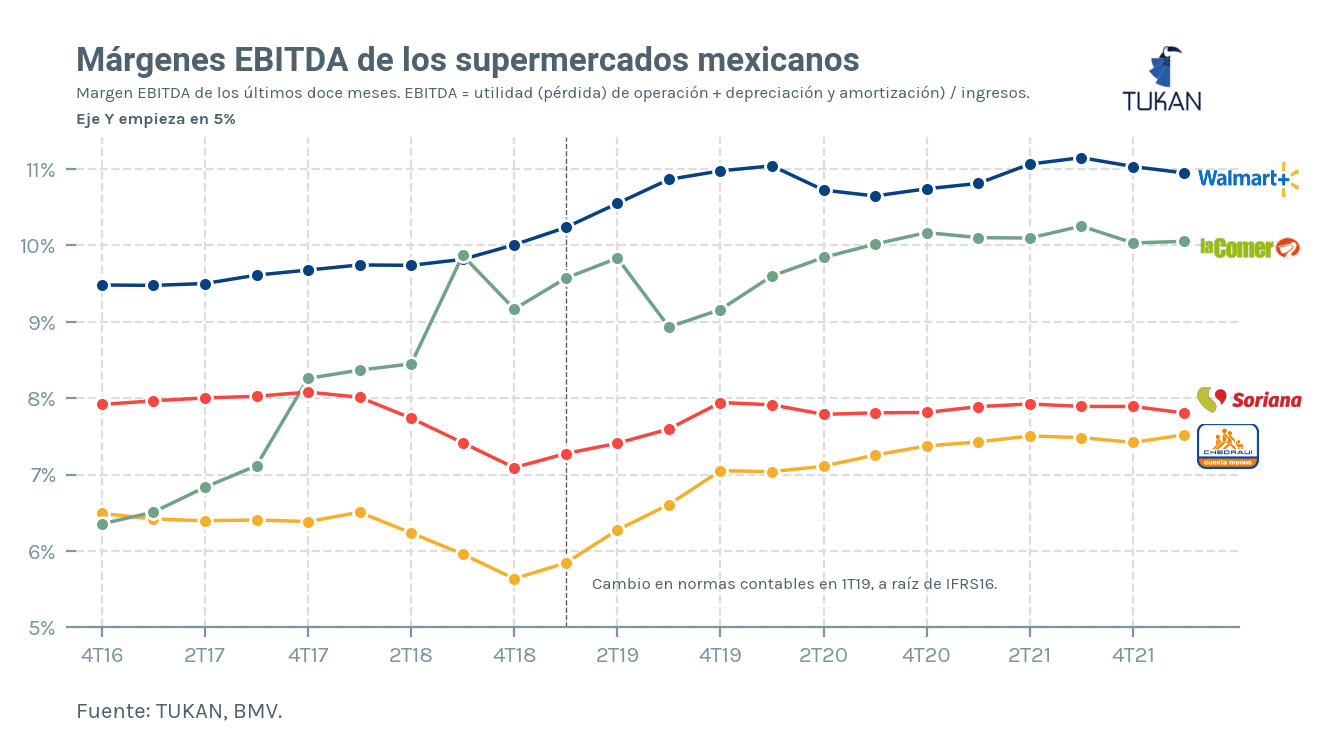

In [83]:
fig = plt.figure(dpi = 200, figsize = (7.5, 3.25))
ax = plt.subplot(111)


colors = ["#f6ae2d", "#084081", "#70a288", "#f64740"]

X_ = range(len(quarters_final))

for index, x in enumerate(data["institutions"].unique()):
    aux_df = data[data["institutions"] == x].copy()
    aux_df.dropna(inplace = True)
    ax.plot(X_, aux_df["ebitda"], marker = "o", ms = 5, mec = "white", zorder = 3, color = colors[index], label = x)

ax.set_xlim(-0.5)
ax.set_ylim(0.05)
ticks_ = ax.xaxis.set_ticks(range(0,len(quarters_final),2))
labels_ = ax.xaxis.set_ticklabels([q for x,q in enumerate(quarters_final) if x % 2 == 0])

# --- Axes transformations

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform

# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

logo_url = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Logo_de_Cherdraui.svg/1200px-Logo_de_Cherdraui.svg.png",
    "https://cdn.corporate.walmart.com/dims4/WMT/cf80266/2147483647/strip/true/crop/855x305+0+0/resize/1960x700!/quality/90/?url=https%3A%2F%2Fcdn.corporate.walmart.com%2F98%2F28%2F342ccbff478ab025592645fafcfc%2Fwalmart-logo.png",
    "https://vecinoslacomer.com/wp-content/uploads/2021/03/LA-COMER_thumbnail.png",
    "https://upload.wikimedia.org/wikipedia/en/thumb/0/0c/Soriana_logo.svg/1280px-Soriana_logo.svg.png"
]

for index, x in enumerate(data["institutions"].unique()):
    print(index)
    aux_df = data[data["institutions"] == x].copy()
    Y_ = aux_df["ebitda"].iloc[-1]
    if x != "Organización Soriana":
        ax_coords = DC_to_NFC([21.25, Y_ - .0045])
    else:
        ax_coords = DC_to_NFC([21.25, Y_ - .0025])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07], zorder=1, anchor = "NW")
    req = urllib.request.Request(f'{logo_url[index]}')
    req.add_header('User-agent', 'Mozilla/5.0 (Windows; U; Windows NT 5.1; de; rv:1.9.1.5) Gecko/20091102 Firefox/3.5.5')
    brand_icon = Image.open(urllib.request.urlopen(req))
    logo_ax.imshow(brand_icon)
    logo_ax.axis("off")

ax.yaxis.set_major_formatter("{x:,.0%}")
ax.plot([9,9],[.05,ax.get_ylim()[1]], ls = "--", color = "#4E616C", lw = 0.5)
ax.text(
    x = 9.5, y = .055,
    s = "Cambio en normas contables en 1T19, a raíz de IFRS16.",
    size = 6
)

fig_text(x = 0.125, y = 1.02, 
         s = "Márgenes EBITDA de los supermercados mexicanos",
        #  highlight_textprops=[{"color": "#084081"}],
         family = "Roboto",
         weight = "bold",
         fontsize = 12)

fig_text(x = 0.125, y = .96, 
         s = "Margen EBITDA de los últimos doce meses. EBITDA = utilidad (pérdida) de operación + depreciación y amortización) / ingresos.\n<Eje Y empieza en 5%>",
         highlight_textprops=[{"weight":"bold"}],
         family = "Karla",
         fontsize = 6)

tukan_im = image.imread("..\\..\\assets\\logo\\logo192.png")
newax = fig.add_axes([.76, .88, 0.18, 0.18], zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig_text(x = 0.125, y = .01, 
         s = "Fuente: TUKAN, BMV.",
         family = "Karla",
         fontsize = 8)

plt.savefig(
   "plots/markets_05102022.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="none",
   edgecolor="none",
   transparent=True,
)

plt.savefig(
   "plots/markets_05102022_white.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)

In [12]:
data["institutions"].unique()

array(['Grupo Comercial Chedraui', 'Wal-Mart de México', 'La Comer',
       'Organización Soriana'], dtype=object)

### CKDes Net Assets

In [55]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "institutions",
        "investments",
        "trust_number"
    ],
    "categories": {
        "institutions": "all",
        "investments": [
            "d355bd6a286d6f4",
            "89f5e8c15cf7658",
            "098ab9ec85446f8",
            "10fb292de6991c4",
            "5af3ff2e5ef640f",
            "00cc5c1c8cd2d48",
            "6af99c1ed29bd28",
            "72da6912200e557",
            "ab967bede55e0fd",
            "86174b2487eb52f",
            "7cfa90fdf03b740",
            "5438c50e2d75257",
            "b4b1977021f22d0",
            "b43bf52117b6c20",
            "461be835cd66f3d",
            "da00fbbcc44bccd",
            "024280a1d26678e",
            "f9f625a1268acb0",
            "7437374f9bc4dd1",
            "35fdd49758c8d3d",
            "bda66f87a15a7b6",
            "4693a3cee431407",
            "0a391a7117a2fcd",
            "c04b811d0b33ce1",
            "d256c535c53de2c",
            "6c063be9d48846d",
            "261192497e4d11c",
            "45ba8f42a3b333c",
            "ce41228abc52c10",
            "4ca1298473454bb",
            "9103f51ade64040",
            "f68cadb4c00ba05",
            "fb4f5dc7f98c5ff",
            "9c96026745082f7",
            "e2f19b529af3b13",
            "cd970f199d608aa",
            "8feb246d70c7678",
            "84a8c01a47b57c1",
            "6583e640090ce50",
            "42cf362131276d9",
            "1537079f4250328",
            "8e54be2e66e86e2",
            "e2271b23d700787",
            "d3371d4a3806f00",
            "de1efb6de0a7395",
            "5b5cbd6860efe62",
            "f2cfc931b276f9a",
            "3e786e8ba590cc8",
            "a08d067759ebab9",
            "0b4f6027cac7623",
            "5acb08aae036deb",
            "0280f59ca988d90",
            "1c7913faa74ba62",
            "d29101177c7762e",
            "d4293aa26ebfa49",
            "61a52758630759c",
            "d8ffe0851d7f5e4",
            "323aae3d2ff86b6",
            "29d45ebfbb909ad",
            "b941550a93471bc",
            "d37b1f9204fee3c",
            "1e5b3652b4f9c44",
            "6794c8e3e28ca4a",
            "982e6781d166d5c",
            "b90cf6991d0dbb6",
            "9b39354327d2ade",
            "a9b2f3514243bdc",
            "02ce27a5e88e228",
            "318d538ca1ad88b",
            "140ccdfc08591af",
            "a0e19759c6dccc2",
            "edf983433c886a6",
            "cb8ccf8be69736b",
            "2bbf6d50606136c",
            "676a3b47efc10eb",
            "9c31c2e650ca95f",
            "39af543e995ec23",
            "6f08498e98f4921",
            "55345c7cc711305",
            "ce36fef9d3432f4",
            "2664a280a79bb8c",
            "f6091e5891cf180",
            "199fe88710ff8d0",
            "1147c009b7e1826",
            "d847e638059b182",
            "54844e0f6ac82e8",
            "199656cbea0cde2",
            "b1a18177ec8d543",
            "9724296dccc2a56",
            "fd9902ee4a6e724",
            "c33494fdd29545c",
            "e3fcdc7202fcb40",
            "0d7107f4d4349cb",
            "68fa935bd1ff0af",
            "1277b40fbb30da3",
            "7f9000b52f108d8",
            "f05b1f84fa9e704",
            "45581f238871d62",
            "791040be3a1de03",
            "a306da5f55a7e9b",
            "a0ef937ed5fb08a",
            "b37eacd8a1c7e6e",
            "c8034d0884e7174",
            "152294bcb0ecdaa",
            "eb737c66d5282c3",
            "4088ee31e48f4c6",
            "09b3e1f8904f7a4",
            "86faf3844a19d16",
            "4929b24ad569b25",
            "c5b755640dae4b1",
            "2c420c8ff2f7b84",
            "7595d02c215af35",
            "7b798c12868bea6",
            "d1e923f07252a17",
            "99329cd94937a20",
            "1c4f0b047fd0939",
            "7f75477bad3bf9d",
            "9bb86626fe21735",
            "380a77248378dcb",
            "66028592b8662c5",
            "57b616253573943"
        ],
        "trust_number": "all"
    },
    "request": [
        {
            "table": "mex_cnbv_ckd_balance_sheet",
            "variables": [
                "aaabada5fb35b5e"
            ]
        }
    ]
}

data = get_tukan_api_request(payload)["data"]

Success getting the data


In [56]:
test_data = data.sort_values(by = "aaabada5fb35b5e", ascending=True).tail(11)
test_data

,date,investments__ref,investments,institutions__ref,institutions,trust_number,aaabada5fb35b5e,trust_number__ref
50,2022-01-01,8feb246d70c7678,ARTH4CK,91df165694fc062,Artha Desarrolladora,2363,5.285718e+09,2363
58,2022-01-01,a0e19759c6dccc2,FINWSCK,ed4a8b7d0d996f9,Finsa Real Estate Management,2469,6.165780e+09,2469
2,2022-01-01,02ce27a5e88e228,FIMMCK,889b62d45dc8451,Macquarie México Infrastructure Management,F00656,6.270743e+09,F00656
23,2022-01-01,39af543e995ec23,GBMICK,d60cc272b7f355c,Corporativo GBM,1491,6.308759e+09,1491
12,2022-01-01,199fe88710ff8d0,IGNIACK,1fbc5edd3c79c16,Administradora Ignia,1827,6.309860e+09,1827
34,2022-01-01,5acb08aae036deb,CSMRTCK,f3de01f1de0fbee,Banco Credit Suisse México,CIB2513,6.315038e+09,CIB2513
54,2022-01-01,9bb86626fe21735,WSMX2CK,1f2ade2ba9a11fe,Walton Street México Managers,2764,1.073553e+10,2764
16,2022-01-01,29d45ebfbb909ad,EXI3CK,61bc8f9424bb05e,México Infrastructure Partners,4432,1.290721e+10,4432
57,2022-01-01,a08d067759ebab9,CS2CK,f3de01f1de0fbee,Banco Credit Suisse México,179122,1.381378e+10,179122
3,2022-01-01,09b3e1f8904f7a4,RCOCB,905117a3ae893e6,Red de Carreteras de Occidente,F00661,1.920204e+10,F00661


In [61]:
test_data.reset_index(inplace = True, drop = True)
test_data.replace({"institutions":{
    "Infraestructura Viable": "PINFRA",
    "Banco Credit Suisse México": "Credit Suisse",
    "Walton Street México Managers": "Walton Street México",
    "Macquarie México Infrastructure Management": "Macquarie México",
    "Finsa Real Estate Management": "Grupo FINSA"
}}, inplace = True)

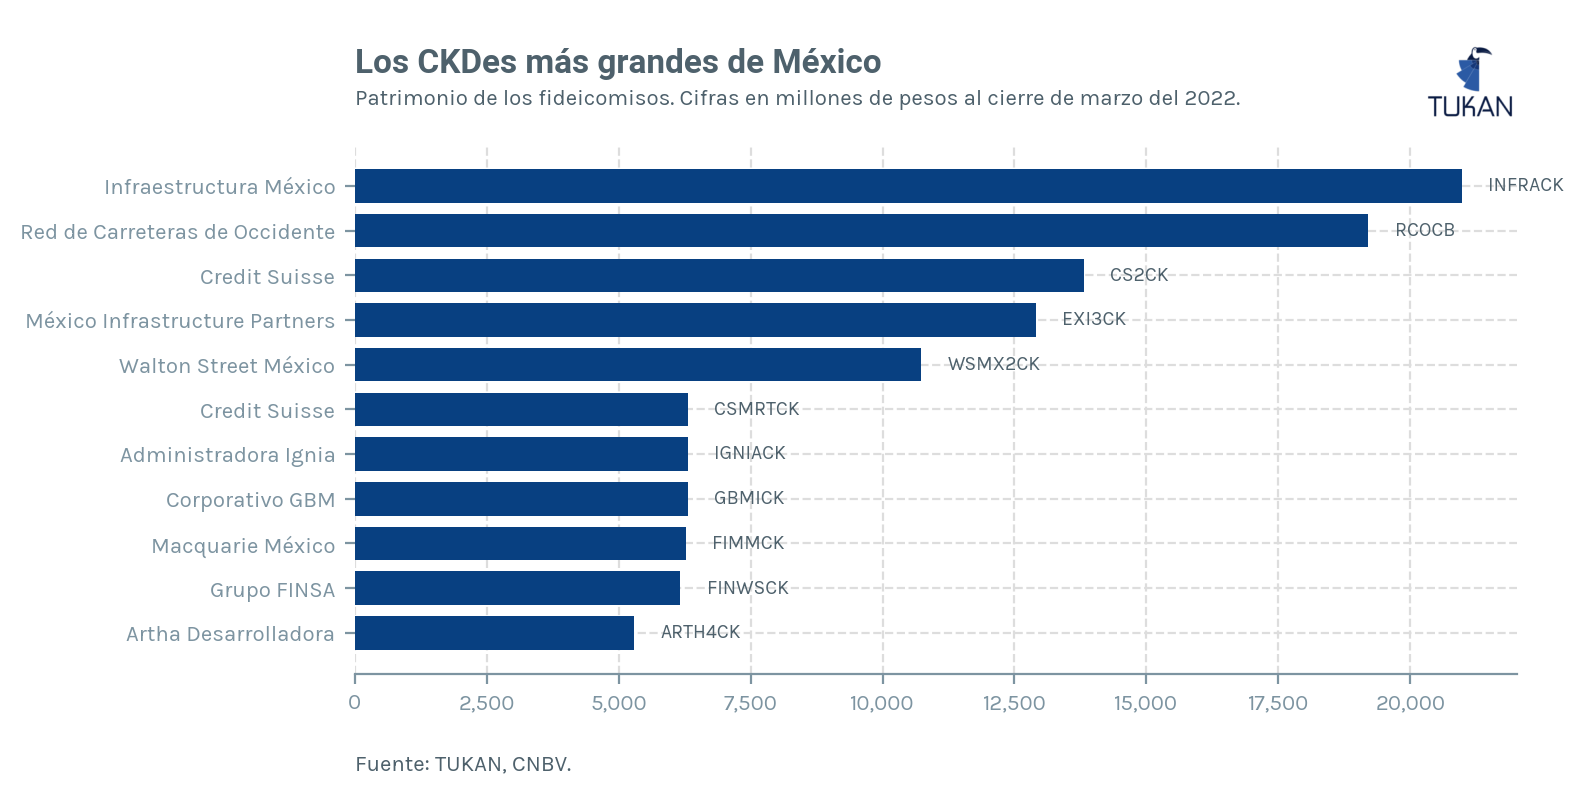

In [64]:
fig = plt.figure(dpi = 200, figsize = (7.5, 3.5))
ax = plt.subplot(111)


ax.barh(test_data.index, test_data["aaabada5fb35b5e"]/1000000, zorder = 3, height = .75)
ax.xaxis.set_major_formatter("{x:,.0f}")
ticks_ = ax.set_yticks(test_data.index)
labels_ = ax.set_yticklabels(test_data["institutions"])

for index, x in enumerate(test_data["investments"]):
    ax_text(
        x = test_data[test_data["investments"] == x]["aaabada5fb35b5e"].iloc[0]/1000000 + 500, y = index,
        s = x,
        ha = "left",
        va = "center",
        size = 7
    )

fig_text(x = 0.125, y = 1.02, 
         s = "Los CKDes más grandes de México",
         family = "Roboto",
         weight = "bold",
         fontsize = 12)

fig_text(x = 0.125, y = .96, 
         s = "Patrimonio de los fideicomisos. Cifras en millones de pesos al cierre de marzo del 2022.",
         family = "Karla",
         fontsize = 8)

tukan_im = image.imread("..\\..\\assets\\logo\\logo192.png")
newax = fig.add_axes([.78, .88, 0.18, 0.18], zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

fig_text(x = 0.125, y = .01, 
         s = "Fuente: TUKAN, CNBV.",
         family = "Karla",
         fontsize = 8)

plt.savefig(
   "plots/ckd_05102022.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="none",
   edgecolor="none",
   transparent=True,
)

plt.savefig(
   "plots/ckd_05102022_white.png",
   dpi=300,
   bbox_inches="tight",
   facecolor="white",
   edgecolor="none",
   transparent=False,
)